# Credit risk modeling in Python - part 4

In [1]:
# Commands to get to same point for data in part 1 and 2 notebooks
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import Image
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

data = pd.read_csv("creditrisk_pydata_nas.csv", index_col = 0)
data = data[data.age < 100]
data = data[data.children < 30]
data = data[data.address < (data.age + 2)]
data[(data.employer > (data.age - 14))]
data = data[(data.employer < (data.age - 14)) | data.employer.isnull()]
data.amount.fillna(data.amount.median(), inplace = True)

bins = [0, 10, 20 ,30, 40, 50]
bins_emp1 = pd.cut(data['employer'], bins)

bins = [0, 2, 5 ,10, 15, 50, 70]
bins_emp2 = pd.cut(data['employer'], bins)
bins_emp2.fillna("(50, 70]", inplace = True)
bins_emp2 = bins_emp2.cat.rename_categories(["(0, 2]","(2, 5]","(5, 10]","(10, 15]","(15, 50]", "unknown"])
bins_emp2 = bins_emp2.cat.as_unordered()

data['employer']= bins_emp2

data['payfreq'] = data['payfreq'].astype('category')
data['marstat'] = data['marstat'].astype('category')
data['home'] = data['home'].astype('category')

data['payfreq'] = data['payfreq'].cat.rename_categories(["quarter","bimon","monthly","biweek"])
data['marstat'] = data['marstat'].cat.rename_categories(["single","married","divorced","widowed"])
data['home'] = data['home'].cat.rename_categories(["yes", "no"])

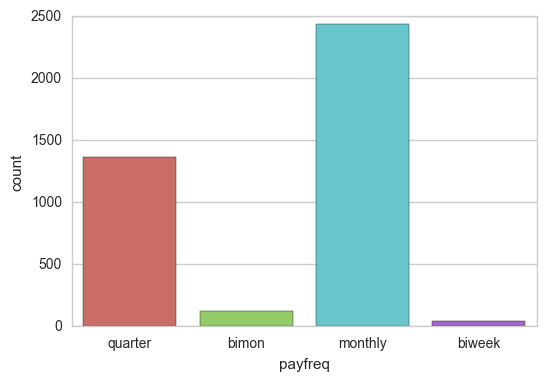

In [2]:
# countplot for payment frequency goes here
sns.countplot(x=data.payfreq, palette = 'hls')
plt.show()

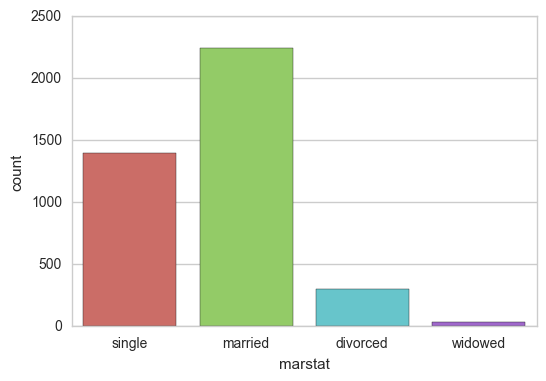

In [3]:
# countplot for marital status goes here
sns.countplot(x=data.marstat, palette = 'hls')
plt.show()

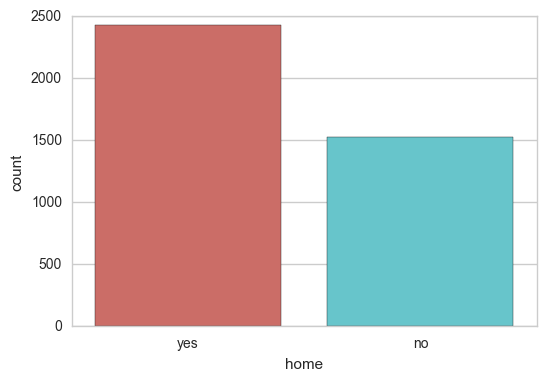

In [4]:
# countplot for home ownership goes here
sns.countplot(x = data.home, palette = 'hls')
plt.show()

#### b. Missing values

Back to general rules for missing values. These are similar but slightly different from continuous variables: 
- replace them: category with the highest frequency
- delete them: row (if very few) or column (if an enormous amount)
- keep them: new category

In [5]:
data.count()

default     3973
month       3973
age         3973
amount      3973
address     3973
employer    3973
children    3973
payfreq     3973
marstat     3973
home        3959
dtype: int64

Only 14 instances are missing, we decided to delete the rows. These were the only missing ones left!

In [6]:
data.dropna(inplace = True)

In [7]:
data.count()

default     3959
month       3959
age         3959
amount      3959
address     3959
employer    3959
children    3959
payfreq     3959
marstat     3959
home        3959
dtype: int64

**Outliers: summary**

![](missing_data.png)

### 2.3 Outcome variables

#### a. Look at individual frequencies for `default` and `month`

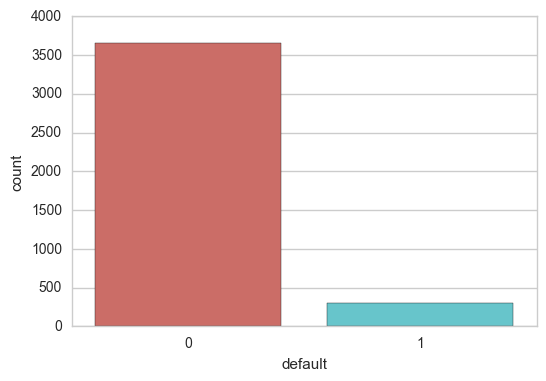

In [8]:
sns.countplot(x=data.default, palette = 'hls')
plt.show()

In [9]:
print(data['default'].value_counts())

0    3654
1     305
Name: default, dtype: int64


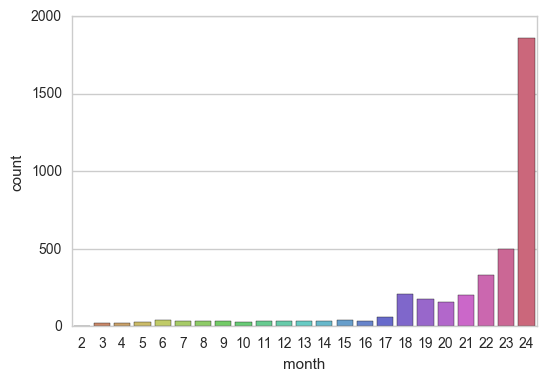

In [10]:
sns.countplot(x=data.month, palette = 'hls')
plt.show()

The combination of `default` and `month`. loan term is 24 months, so there are 3 possible outcomes:
- `default` is 0 and `month` is 24: loan has been repaid successfully.
- `default` is 0 and `month` is somewhere between 1 and 23: the loan is still being repaid.
- `default` is 1 and `month` is $m$ $\in$ [1, 24]: default took place in month $m$.

#### b. How do our variables interact with `default`? 

In [11]:
crosstab_marstat = pd.crosstab(data["marstat"], data["default"])
crosstab_marstat

default,0,1
marstat,,
single,1254,137
married,2099,135
divorced,266,31
widowed,35,2


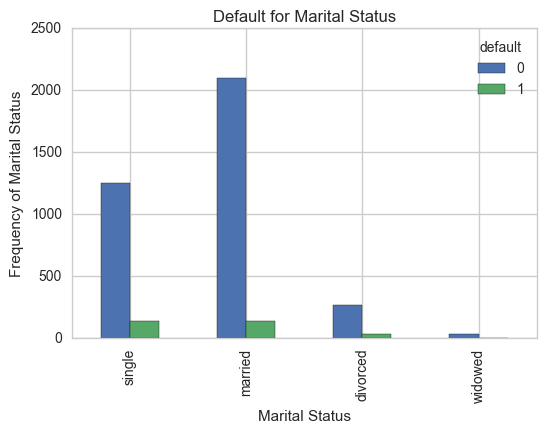

In [12]:
%matplotlib inline
crosstab_marstat.plot(kind='bar')
plt.title('Default for Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Frequency of Marital Status')

Volume differences: let's look at a stacked chart.

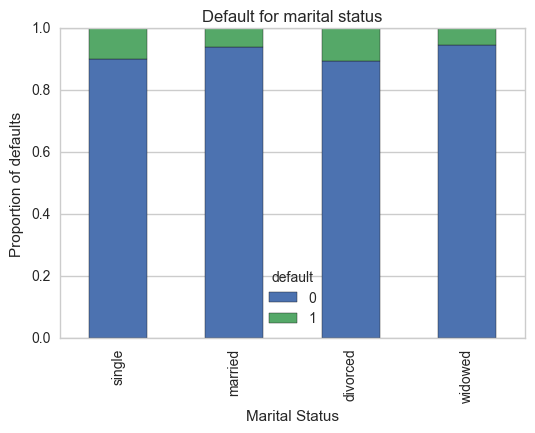

In [13]:
crosstab_marstat.div(crosstab_marstat.sum(1), axis=0).plot(kind='bar', stacked = True)
plt.title('Default for marital status')
plt.xlabel('Marital Status')
plt.ylabel('Proportion of defaults')

We can also get the numeric fraction through using `normalize='index'` in pd.crosstab directly.

In [14]:
pd.crosstab(data["marstat"], data["default"],  normalize='index')

default,0,1
marstat,,
single,0.901510,0.098490
married,0.939570,0.060430
divorced,0.895623,0.104377
widowed,0.945946,0.054054


Recommended to make crosstables and plots for `home` and `payfreq` too! 

In a bit, you'll try it yourself for the newly categorized variable `employer`.

### 2.4 Summary

In [15]:
data.head()

,default,month,age,amount,address,employer,children,payfreq,marstat,home
1,0,21,25,1000.0,0.3,"(0, 2]",0,monthly,single,yes
2,0,23,40,2000.0,5.6,"(5, 10]",2,monthly,married,yes
3,0,24,21,1400.0,8.7,unknown,0,monthly,single,no
4,0,24,21,1200.0,21.5,"(2, 5]",0,monthly,single,no
5,0,24,62,1500.0,1.2,"(0, 2]",0,monthly,single,no


- 4 categorical variables 
- 4 continuous variables
- 3959 observations
- 305 defaults -> 7.70%

In the remainder of this presentation, we will work with 2 versions of this data set.

- First we will look at ML classification methods. **Have to take the censored cases out.**
- Secondly, we will briefly cover survival analysis methods. These methods can take censored instances into account!

But first, try it yourself!

Create these for our newly "binned" categorical variable 'employer':
- A crosstable (value counts) --> store it in crosstab_employer
- A stacked chart
- A normalized crosstable

In [ ]:
# Crosstable
crosstab_employer = ___

In [ ]:
# Stacked chart


In [ ]:
# Crosstable with fractions
